In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
def load_cifar100():
    (x_train, y_train), (x_test, y_test) = cifar100.load_data()
    x_train = x_train.astype("float32") / 255.0
    x_test = x_test.astype("float32") / 255.0

    y_train = to_categorical(y_train, 100)
    y_test = to_categorical(y_test, 100)

    return x_train, y_train, x_test, y_test

In [3]:
def resnet_block_conv(x, filters, downsample=False):
    stride = 2 if downsample else 1
    y = layers.Conv2D(filters, 3, strides=stride, padding='same', use_bias=False)(x)
    y = layers.BatchNormalization()(y)
    y = layers.ReLU()(y)
    y = layers.Conv2D(filters, 3, padding='same', use_bias=False)(y)
    y = layers.BatchNormalization()(y)

    if downsample or x.shape[-1] != filters:
        x = layers.Conv2D(filters, 1, strides=stride, padding='same', use_bias=False)(x)
        x = layers.BatchNormalization()(x)

    return layers.ReLU()(x + y)

In [4]:
def build_resnet20_cifar100():
    inputs = layers.Input(shape=(32, 32, 3))
    x = layers.Conv2D(16, 3, padding='same', use_bias=False)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    for _ in range(3):
        x = resnet_block_conv(x, 16)
    for i in range(3):
        x = resnet_block_conv(x, 32, downsample=(i == 0))
    for i in range(3):
        x = resnet_block_conv(x, 64, downsample=(i == 0))

    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(100, activation='softmax')(x)

    return models.Model(inputs, outputs)

In [5]:
def plot_history(history, title=''):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title(f'{title} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{title} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [6]:
def train_model(model, x_train, y_train, x_test, y_test, title='Model'):
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    print(f"\n📋 {title} Summary:")
    model.summary()

    print(f"\n🚀 Training {title}...\n")
    history = model.fit(x_train, y_train,
                        epochs=30,
                        batch_size=64,
                        validation_data=(x_test, y_test))

    return history

In [7]:
def evaluate_model(model, x_test, y_test, title='Model'):
    loss, acc = model.evaluate(x_test, y_test, verbose=0)
    print(f"\n✅ {title} Test Accuracy: {acc:.4f}")


📋 ResNet-20 Conv Summary:


2025-04-21 16:41:03.077997: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 32, 32,    │        432 │ input_layer[0][0] │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 32, 32,    │         64 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu (ReLU)        │ (None, 32, 32,    │          0 │ batch_normalizat… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 32, 32,    │      2,304 │ re_lu[0][0]       │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │         64 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_1 (ReLU)      │ (None, 32, 32,    │          0 │ batch_normalizat… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 32, 32,    │      2,304 │ re_lu_1[0][0]     │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │         64 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 32, 32,    │          0 │ re_lu[0][0],      │
│                     │ 16)               │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_2 (ReLU)      │ (None, 32, 32,    │          0 │ add[0][0]         │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 32, 32,    │      2,304 │ re_lu_2[0][0]     │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │         64 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_3 (ReLU)      │ (None, 32, 32,    │          0 │ batch_normalizat… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 32, 32,    │      2,304 │ re_lu_3[0][0]     │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │         64 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 32, 32,    │          0 │ re_lu_2[0][0],  

 Total params: 279,892 (1.07 MB)

 Trainable params: 278,324 (1.06 MB)

 Non-trainable params: 1,568 (6.12 KB)


🚀 Training ResNet-20 Conv...

Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 46s 53ms/step - accuracy: 0.0834 - loss: 4.0668 - val_accuracy: 0.1592 - val_loss: 3.4502
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 55ms/step - accuracy: 0.2307 - loss: 3.0855 - val_accuracy: 0.1620 - val_loss: 3.7347
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 54ms/step - accuracy: 0.3177 - loss: 2.6412 - val_accuracy: 0.2763 - val_loss: 2.8883
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 54ms/step - accuracy: 0.3792 - loss: 2.3290 - val_accuracy: 0.3547 - val_loss: 2.4561
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 54ms/step - accuracy: 0.4262 - loss: 2.1089 - val_accuracy: 0.3329 - val_loss: 2.5982
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 55ms/step - accuracy: 0.4635 - loss: 1.9469 - val_accuracy: 0.3775 - val_loss: 2.4937
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 55ms/step - accuracy: 0.4949 - loss: 1.8028 - val_accuracy: 0.3609 - val_loss: 2.5608
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 54ms/step - acc

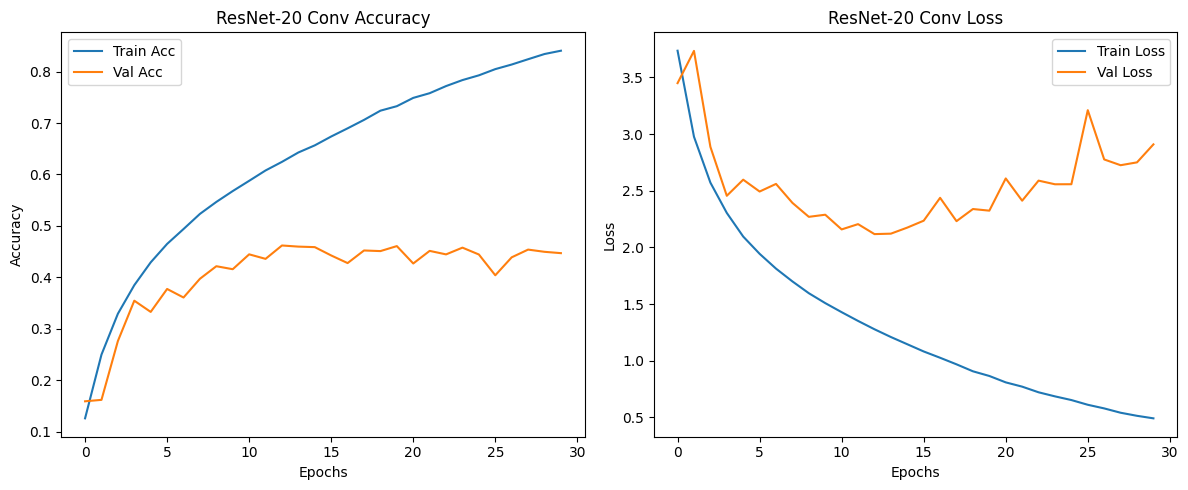


✅ ResNet-20 Conv Test Accuracy: 0.4471


In [8]:
if __name__ == "__main__":
    x_train, y_train, x_test, y_test = load_cifar100()
    model = build_resnet20_cifar100()
    history = train_model(model, x_train, y_train, x_test, y_test, title="ResNet-20 Conv")
    plot_history(history, title="ResNet-20 Conv")
    evaluate_model(model, x_test, y_test, title="ResNet-20 Conv")